<a href="https://colab.research.google.com/github/Sancheuz123/chiselni_metod/blob/main/%D0%9B%D0%A0_7_%D0%93%D0%B0%D0%B9%D0%B2%D0%BE%D1%80%D0%BE%D0%BD%D1%81%D1%8C%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Гайворонський Олександир
#Лабораторна робота №7
#Варіант 3
#Група 2-8

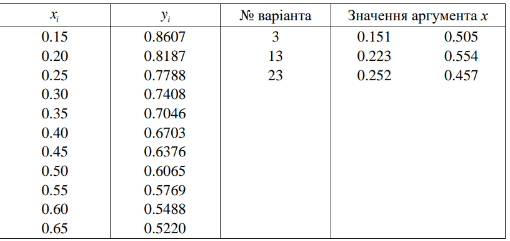

In [14]:
import numpy as np
from math import factorial


x = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65])
y = np.array([0.8607, 0.8187, 0.7788, 0.7408, 0.7046, 0.6703, 0.6376, 0.6065, 0.5769, 0.5488, 0.5220])

def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]


    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    q = (x0 - x[0]) / h

    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans

x1 = 0.151
y1 = newton_forward_interpolation(x, y, x1)

print(f"f({x1}) = {y1}")

f(0.151) = 0.8599031176364222


In [16]:
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]


    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    q = (x0 - x[-1]) / h


    ans = delta_y[-1, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)

    return ans

x2 = 0.554
y2 = newton_backward_interpolation(x, y, x2)

print(f"f({x2}) = {y2}")


f(0.554) = 0.5745883825303136


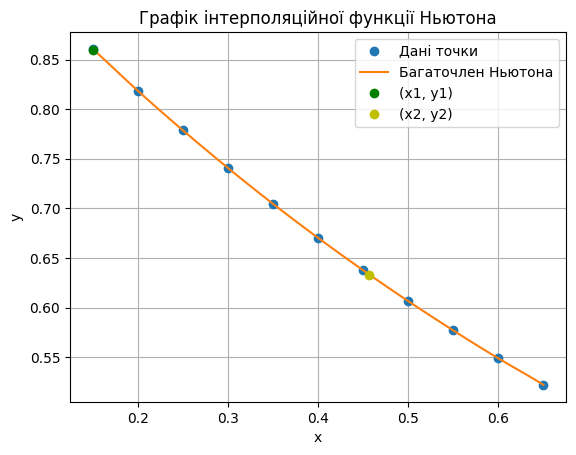

In [10]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(np.min(x), np.max(x), 120)
yy = np.zeros_like(xx)
for i in range(len(xx)):

    if xx[i] <= x[len(x) // 2]:
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy,  label="Багаточлен Ньютона")
plt.plot(x1, y1, 'go', label='(x1, y1)')
plt.plot(x2, y2, 'yo', label='(x2, y2)')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()